Group Members- Rashik Iram Chowdhury (2111336642), Zarin Akter (2011704042) and Md. Mutasim Farhan (2013123642)

# Loading the dataset and adjusting it to our criterion

In [1]:
pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo 
  
car_evaluation = fetch_ucirepo(id=19) 
  
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

In [42]:
import pandas as pd

# Assuming X and y are numpy arrays
# Convert them into pandas DataFrame
X = pd.DataFrame(X, columns=car_evaluation.feature_names)
y = pd.DataFrame(y, columns=['class'])

# Concatenate features and targets along columns
df = pd.concat([X_df, y_df], axis=1)

# Print the DataFrame
print(df)


      buying  maint  doors  persons  lug_boot  safety  class
0          3      3      0        0         2       1      2
1          3      3      0        0         2       2      2
2          3      3      0        0         2       0      2
3          3      3      0        0         1       1      2
4          3      3      0        0         1       2      2
...      ...    ...    ...      ...       ...     ...    ...
1723       1      1      3        2         1       2      1
1724       1      1      3        2         1       0      3
1725       1      1      3        2         0       1      2
1726       1      1      3        2         0       2      1
1727       1      1      3        2         0       0      3

[1728 rows x 7 columns]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [43]:
X['buying']

0       3
1       3
2       3
3       3
4       3
       ..
1723    1
1724    1
1725    1
1726    1
1727    1
Name: buying, Length: 1728, dtype: int64

**Handling categorical values or encoding**

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [6]:
X.loc[:, 'buying'] = le.fit_transform(X['buying'])
X.loc[:, 'maint'] = le.fit_transform(X['maint'])
X.loc[:, 'doors'] = le.fit_transform(X['doors'])
X.loc[:, 'persons'] = le.fit_transform(X['persons'])
X.loc[:, 'lug_boot'] = le.fit_transform(X['lug_boot'])
X.loc[:, 'safety'] = le.fit_transform(X['safety'])
y.loc[:, 'class'] = le.fit_transform(y['class'])


C:\Users\User\AppData\Local\Temp\ipykernel_13128\607595182.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 2 2 ... 2 1 3]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  y.loc[:, 'class'] = le.fit_transform(y['class'])


In [65]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   1728 non-null   int64
dtypes: int64(1)
memory usage: 13.6 KB


In [22]:
y['class'].unique()

array([2, 0, 3, 1], dtype=int64)

In [23]:
X.info

<bound method DataFrame.info of       buying  maint  doors  persons  lug_boot  safety
0          3      3      0        0         2       1
1          3      3      0        0         2       2
2          3      3      0        0         2       0
3          3      3      0        0         1       1
4          3      3      0        0         1       2
...      ...    ...    ...      ...       ...     ...
1723       1      1      3        2         1       2
1724       1      1      3        2         1       0
1725       1      1      3        2         0       1
1726       1      1      3        2         0       2
1727       1      1      3        2         0       0

[1728 rows x 6 columns]>

In [24]:
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2


In [25]:
duplicates = df[df.duplicated(keep='first')]
duplicates

,buying,maint,doors,persons,lug_boot,safety,class


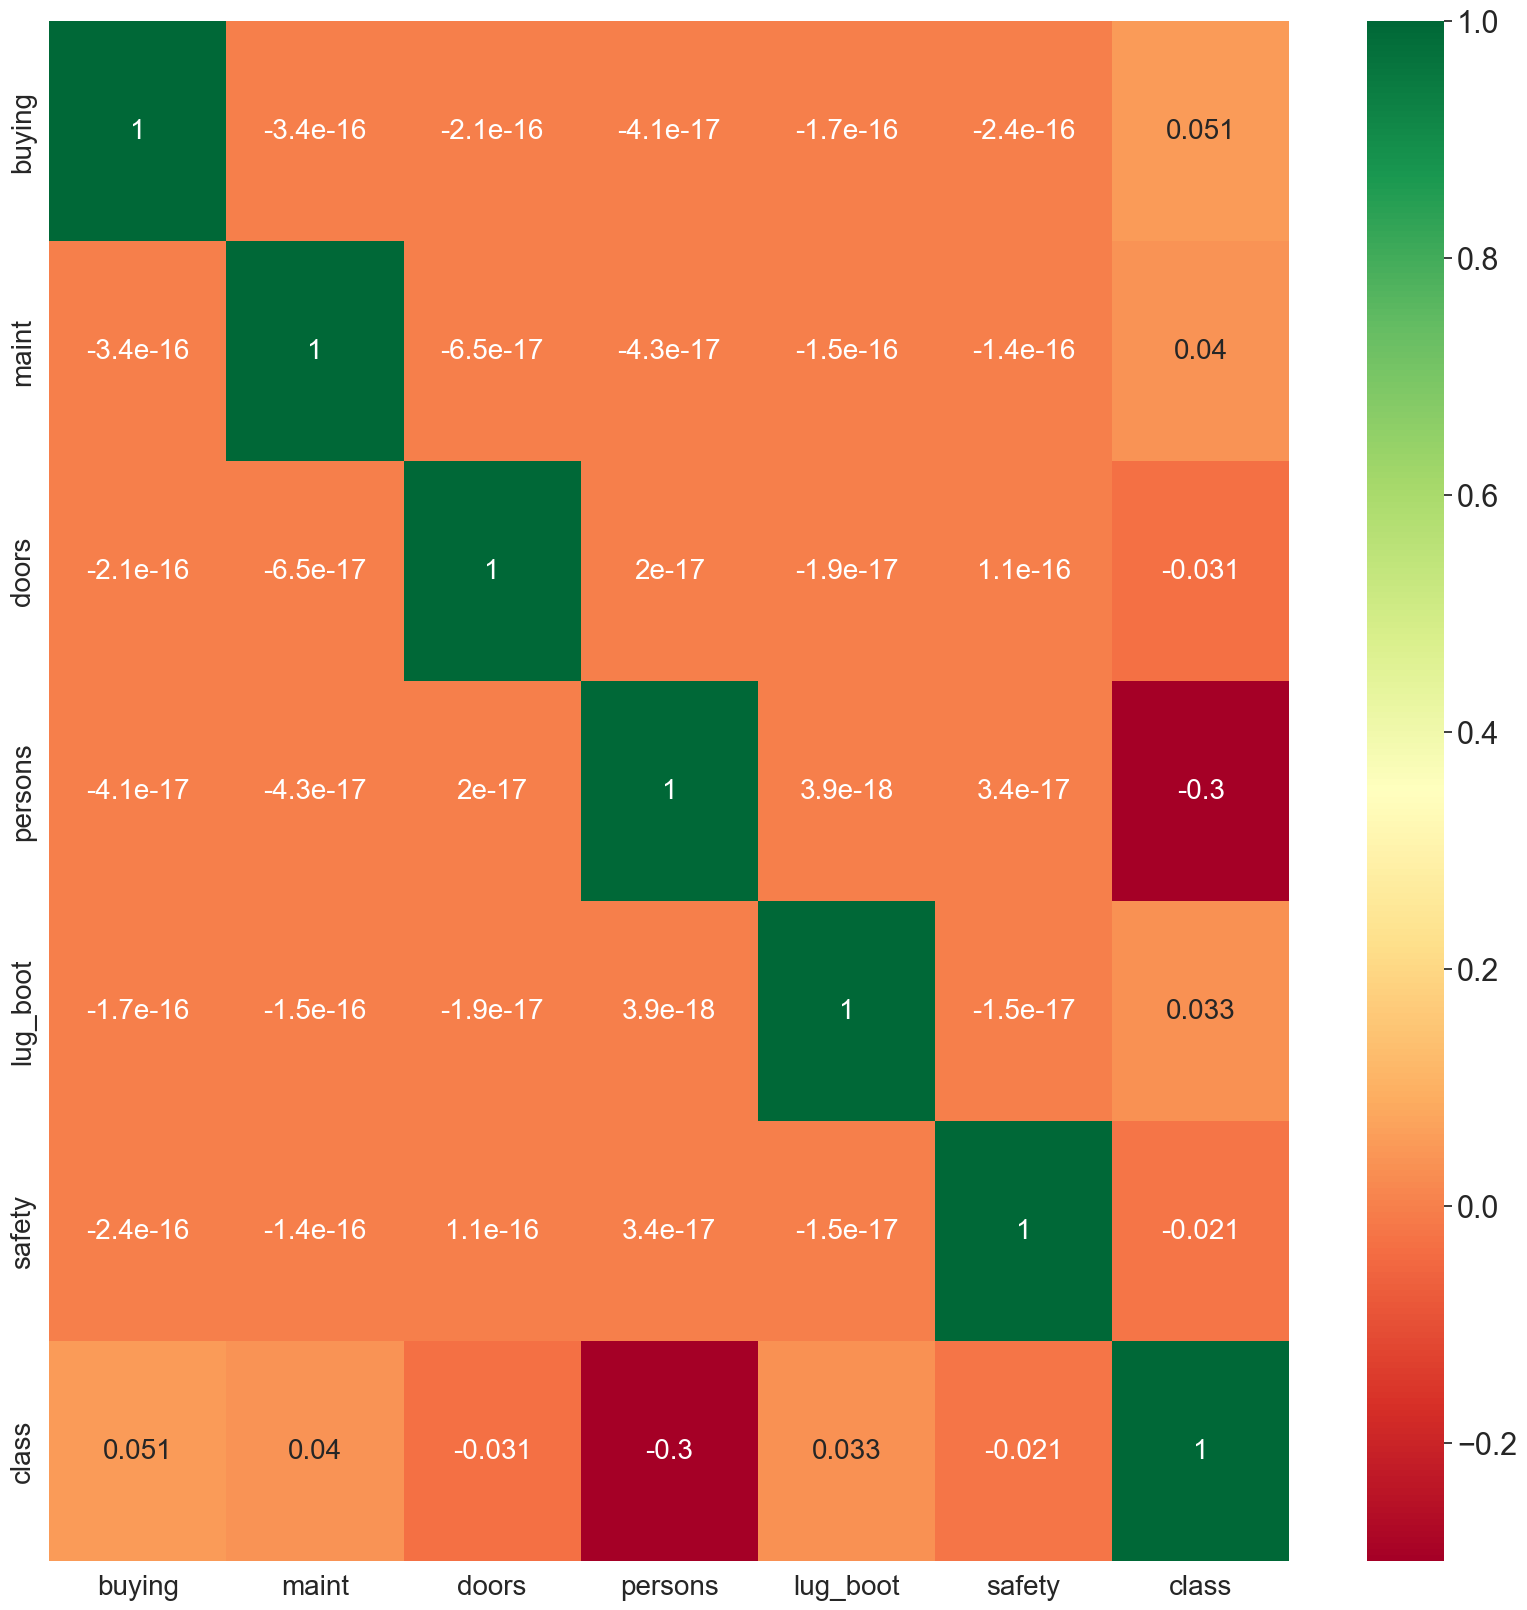

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap="RdYlGn", annot_kws={'size': 20})   #heatmap
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

<Axes: >

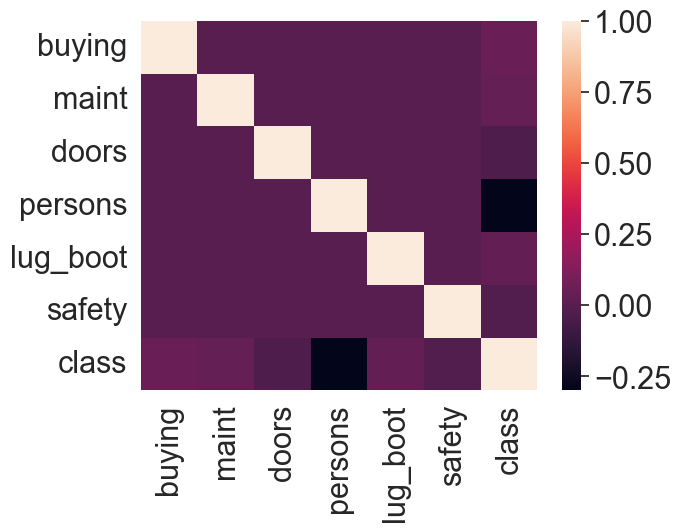

In [27]:
sns.heatmap(df.corr())

In [45]:
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [46]:
y

,class
0,2
1,2
2,2
3,2
4,2
...,...
1723,1
1724,3
1725,2
1726,1


In [47]:
total_samples = len(X)
train_samples = int(total_samples * 0.70)
valid_samples = int(total_samples * 0.15)

print("Train Samples: ", train_samples)
print("Valid Samples: ", valid_samples)


X_train, y_train = X[:train_samples], y[:train_samples]
X_valid, y_valid = X[train_samples:train_samples+valid_samples], y[train_samples:train_samples+valid_samples]
X_test, y_test = X[train_samples+valid_samples:], y[train_samples+valid_samples:]

print("Total Samples: ", len(X))
print("Training Size: ", len(X_train))
print("Validation Size: ", len(X_valid))
print("Testing Size: ", len(X_test))

Train Samples:  1209
Valid Samples:  259
Total Samples:  1728
Training Size:  1209
Validation Size:  259
Testing Size:  260


# Feature Engineering

In [48]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.fit_transform(X_valid) 
X_test = scaler.fit_transform(X_test)

In [38]:
X_test

array([[ 0.        , -1.72145713,  0.27832094, -0.04272221,  1.23065299,
         1.22239637],
       [ 0.        , -1.72145713,  0.27832094, -0.04272221,  1.23065299,
        -1.22239637],
       [ 0.        , -1.72145713,  0.27832094, -0.04272221,  0.00471515,
         0.        ],
       ...,
       [ 0.        , -0.34004091,  1.17169678,  1.19147509, -1.22122269,
         0.        ],
       [ 0.        , -0.34004091,  1.17169678,  1.19147509, -1.22122269,
         1.22239637],
       [ 0.        , -0.34004091,  1.17169678,  1.19147509, -1.22122269,
        -1.22239637]])

In [53]:
y_train = np.squeeze(y_train)
y_valid= np.squeeze(y_valid)
y_test = np.squeeze(y_test)


In [70]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def evaluate_DecisionTree(maximum_depth, minimum_samples_split):
    model = DecisionTreeClassifier(max_depth=maximum_depth, min_samples_split=minimum_samples_split)
    model.fit(X_train, y_train)

    y_valid_predict = model.predict(X_valid)
    accuracy = np.mean(y_valid_predict == y_valid)
    return accuracy,  model

best_accuracy = 0.0
best_depth = None
best_min_samples = None
best_model = None

for depth in range(2, 200):  # Adjust the range as needed
    for min_samples in range(2, 200):  # Adjust the range as needed
        accuracy, model = evaluate_DecisionTree(depth, min_samples)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth
            best_min_samples = min_samples
            best_model = model
            


print(f"Best Hyperparameters: max_depth={best_depth}, min_samples_split={best_min_samples}")
print(f"Best Validation Accuracy: {round((best_accuracy*100),2)}")
y_test_predict = best_model.predict(X_test)
test_accuracy = np.mean(y_test_predict == y_test)
print(f"Test Accuracy: {round((test_accuracy*100),2)}")


unique_labels = np.unique(np.concatenate([y_test, y_test_predict]))
confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)))

# Update confusion matrix
for true_label, pred_label in zip(y_test, y_test_predict):
    true_idx = np.where(unique_labels == true_label)[0][0]
    pred_idx = np.where(unique_labels == pred_label)[0][0]
    confusion_matrix[true_idx, pred_idx] += 1

print("Confusion Matrix:")
print(confusion_matrix)




Best Hyperparameters: max_depth=2, min_samples_split=2
Best Validation Accuracy: 72.59
Test Accuracy: 56.15
Confusion Matrix:
[[  4.   0.  32.   0.]
 [ 20.   0.  26.   0.]
 [  2.   0. 142.   0.]
 [ 34.   0.   0.   0.]]


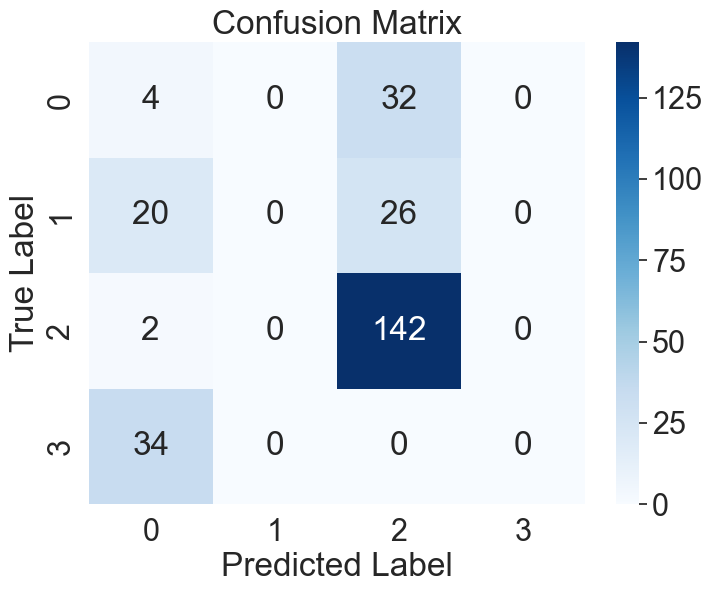

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt=".0f")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [80]:
# Compute precision, recall, and F-score for each class
precision_per_class = []
recall_per_class = []
fscore_per_class = []

for class_label in np.unique(y_test):
    true_positives = np.sum((y_test == class_label) & (y_test_predict == class_label))
    false_positives = np.sum((y_test != class_label) & (y_test_predict == class_label))
    false_negatives = np.sum((y_test == class_label) & (y_test_predict != class_label))
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    fscore = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    precision_per_class.append(precision)
    recall_per_class.append(recall)
    fscore_per_class.append(fscore)

# Compute average precision, recall, and F-score across all classes
average_precision = np.mean(precision_per_class)
average_recall = np.mean(recall_per_class)
average_fscore = np.mean(fscore_per_class)

print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F-score: {average_fscore}")


Average Precision: 0.19416666666666665
Average Recall: 0.2743055555555556
Average F-score: 0.22722868217054262
